# Annotation dotplots
# 10/8/2021 Chenqu

In [1]:
import scanpy as sc
import pandas as pd

# Load data

In [3]:
adata = sc.read_h5ad("/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.20210429.h5ad")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
adata.var_names_make_unique()
adata.raw = adata.copy()

In [5]:
obs = pd.read_csv('/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv', index_col = 0) # final annotations and removed maternal contaminant cells

/home/jovyan/my-conda-envs/skeleton/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
adata = adata[adata.obs_names.isin(obs.index)].copy()

In [7]:
for col in obs:
    adata.obs[col] = obs[col] # use anno_lvl_2_final_clean

In [29]:
adata.obs['anno_lvl_2_final_clean'] = adata.obs['anno_lvl_2_final_clean'].astype('category')
adata.obs['anno_lvl_2_final']=adata.obs['anno_lvl_2_final'].astype('category')

# B cell marker gene plot

In [11]:
Bcell = adata[adata.obs['anno_lvl_2_final_clean'].isin(['LMPP_ELP','PRE_PRO_B','PRO_B','LATE_PRO_B','LARGE_PRE_B','SMALL_PRE_B','IMMATURE_B',
                                            'MATURE_B','CYCLING_B','B1','PLASMA_B'])]

In [12]:
Bcell.obs['anno_lvl_2_final_clean'] = Bcell.obs['anno_lvl_2_final_clean'].cat.reorder_categories(['LMPP_ELP','PRE_PRO_B','PRO_B','LATE_PRO_B','LARGE_PRE_B','SMALL_PRE_B','IMMATURE_B',
                                            'MATURE_B','B1','PLASMA_B','CYCLING_B'])

Trying to set attribute `.obs` of view, copying.


... storing 'file' as categorical
... storing 'predicted_doublets' as categorical
... storing 'name' as categorical
... storing 'uniform_label' as categorical
... storing 'uniform_label_expanded_merged' as categorical
... storing 'uniform_label_lvl0' as categorical
... storing 'organ' as categorical
... storing 'Sample.lanes' as categorical
... storing 'Sort_id' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'sex' as categorical
... storing 'Processing_method' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'Sample' as categorical
... storing 'anno_lvl_1_LYMPHOID' as categorical
... storing 'anno_lvl_2_LYMPHOID' as categorical
... storing 'anno_lvl_1_MYELOID' as categorical
... storing 'anno_lvl_2_MYELOID' as categorical
... storing 'anno_lvl_1_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_final' as categorical
... storing 'anno_lvl_1_STROMA' as c

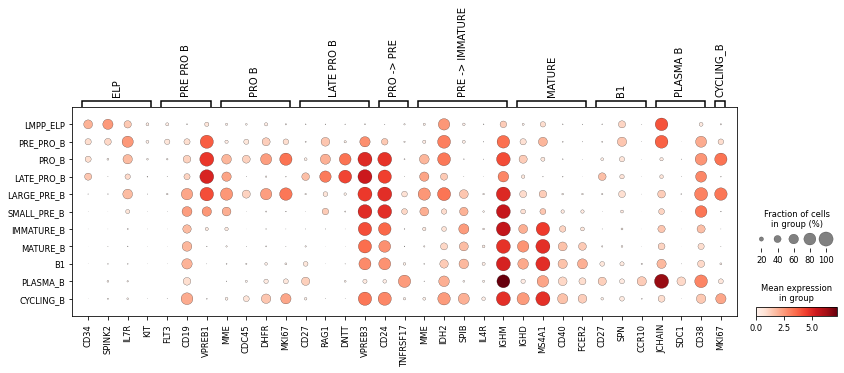

In [13]:
markers = {'ELP':['CD34','SPINK2','IL7R','KIT'],
           'PRE PRO B':['FLT3','CD19','VPREB1'], 
           'PRO B':['MME','CDC45','DHFR','MKI67'], 
           'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 
           'PRO -> PRE':['CD24','TNFRSF17'], 
           'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R','IGHM'], 
           'MATURE':['IGHD','MS4A1','CD40','FCER2'], 
           'B1':['CD27','SPN','CCR10'],
           'PLASMA B':['JCHAIN','SDC1','CD38'],
           'CYCLING_B':['MKI67']
          }
sc.pl.dotplot(Bcell, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=True, save='B_clean_anno.png')

# NKT/ILC marker genes

In [14]:
Tcell = adata[adata.obs['anno_lvl_2_final_clean'].isin(['DN(early)_T','DN(P)_T','DN(Q)_T','DP(P)_T','DP(Q)_T','ABT(ENTRY)','CD8+T',
                                                                          'CD4+T','TREG','CYCLING_T','CD8AA','TH17','ILC3','ILC2','CYCLING_ILC',
                                                                          'NK_T','NK','CYCLING_NK'])]

In [15]:
Tcell.obs['anno_lvl_2_final_clean'] = Tcell.obs['anno_lvl_2_final_clean'].cat.reorder_categories(['DN(early)_T','DN(P)_T','DN(Q)_T','DP(P)_T','DP(Q)_T','ABT(ENTRY)','CD8+T',
                                                                          'CD4+T','TREG','CYCLING_T','CD8AA','TH17','ILC3','ILC2','CYCLING_ILC',
                                                                          'NK_T','NK','CYCLING_NK'])

Trying to set attribute `.obs` of view, copying.


... storing 'file' as categorical
... storing 'predicted_doublets' as categorical
... storing 'name' as categorical
... storing 'uniform_label' as categorical
... storing 'uniform_label_expanded_merged' as categorical
... storing 'uniform_label_lvl0' as categorical
... storing 'organ' as categorical
... storing 'Sample.lanes' as categorical
... storing 'Sort_id' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'sex' as categorical
... storing 'Processing_method' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'Sample' as categorical
... storing 'anno_lvl_1_LYMPHOID' as categorical
... storing 'anno_lvl_2_LYMPHOID' as categorical
... storing 'anno_lvl_1_MYELOID' as categorical
... storing 'anno_lvl_2_MYELOID' as categorical
... storing 'anno_lvl_1_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_final' as categorical
... storing 'anno_lvl_1_STROMA' as c

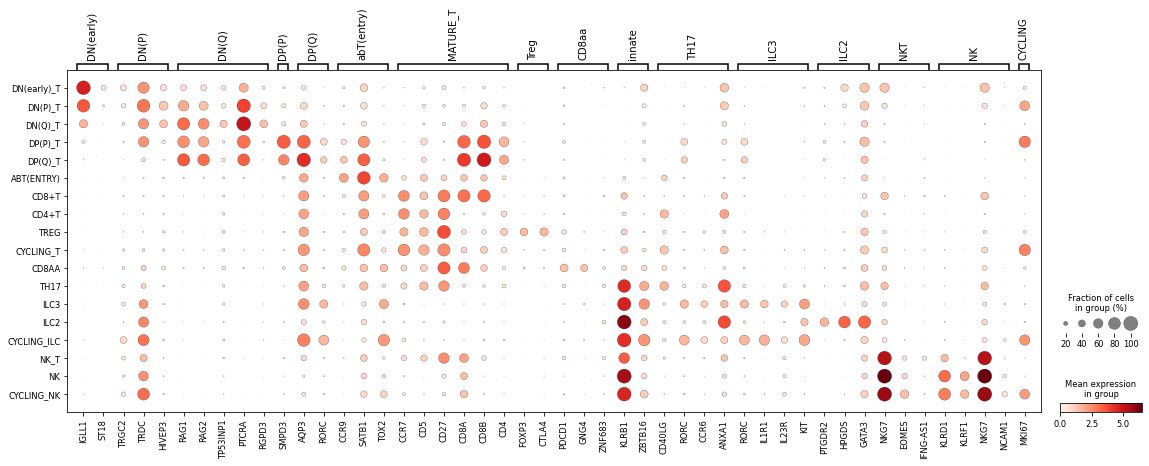

In [16]:
markers = {'DN(early)':['IGLL1','ST18'],
           'DN(P)':['TRGC2','TRDC','HIVEP3'],
           'DN(Q)':['RAG1','RAG2','TP53INP1','PTCRA','RGPD3'],
           'DP(P)':['SMPD3'], 
           'DP(Q)':['AQP3','RORC'], 
           'abT(entry)':['CCR9','SATB1','TOX2'], 
           'MATURE_T':['CCR7','CD5','CD27','CD8A','CD8B','CD4'], 
           #'agonist selection':['TNFRSF9','CD27','IKZF2','IKZF3'],
           'Treg':['FOXP3','CTLA4'], 
           'CD8aa':['PDCD1','GNG4','ZNF683'], 
           'innate':['KLRB1','ZBTB16'],
           'TH17':['CD40LG','RORC','CCR6','ANXA1'],
           'ILC3': ['RORC','IL1R1','IL23R','KIT'],
           'ILC2':['PTGDR2','HPGDS','GATA3'],
           'NKT':['NKG7','EOMES','IFNG-AS1'],
           'NK': ['KLRD1','KLRF1','NKG7','NCAM1'],
           'CYCLING':['MKI67'],
          }
sc.pl.dotplot(Tcell, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=False, save='T_clean_anno.png')

# Progenitor marker genes

In [17]:
progenitor = adata[adata.obs['anno_lvl_2_final_clean'].isin(['HSC_MPP', 'CYCLING_MPP', 'LMPP_ELP','PRE_PRO_B', 'DN(early)_T','DN(P)_T', 
                                                                                                  'MEMP','CYCLING_MEMP', 'MEP', 'EARLY_MK', 'DOUBLET_ERY_B', 
                                                                                                  'CMP', 'GMP',  'PROMONOCYTE', 'PROMYELOCYTE'])]

In [18]:
progenitor.obs['anno_lvl_2_final_clean'] = progenitor.obs['anno_lvl_2_final_clean'].cat.reorder_categories(['HSC_MPP', 'CYCLING_MPP', 'LMPP_ELP','PRE_PRO_B', 'DN(early)_T','DN(P)_T', 
                                                                                                  'MEMP','CYCLING_MEMP', 'MEP', 'EARLY_MK', 'DOUBLET_ERY_B', 
                                                                                                  'CMP', 'GMP',  'PROMONOCYTE', 'PROMYELOCYTE'])

Trying to set attribute `.obs` of view, copying.


... storing 'file' as categorical
... storing 'predicted_doublets' as categorical
... storing 'name' as categorical
... storing 'uniform_label' as categorical
... storing 'uniform_label_expanded_merged' as categorical
... storing 'uniform_label_lvl0' as categorical
... storing 'organ' as categorical
... storing 'Sample.lanes' as categorical
... storing 'Sort_id' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'sex' as categorical
... storing 'Processing_method' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'Sample' as categorical
... storing 'anno_lvl_1_LYMPHOID' as categorical
... storing 'anno_lvl_2_LYMPHOID' as categorical
... storing 'anno_lvl_1_MYELOID' as categorical
... storing 'anno_lvl_2_MYELOID' as categorical
... storing 'anno_lvl_1_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_final' as categorical
... storing 'anno_lvl_1_STROMA' as c

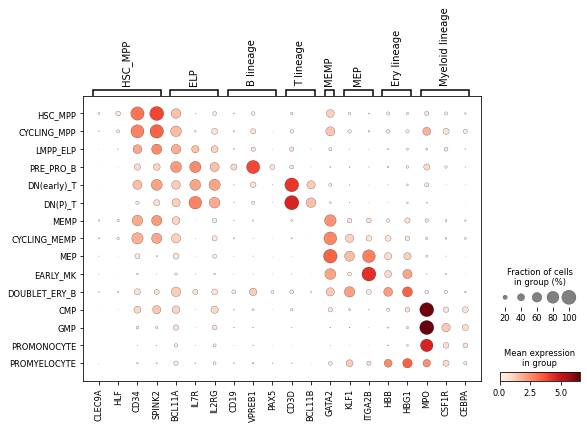

In [19]:
markers = {'HSC_MPP':['CLEC9A','HLF','CD34','SPINK2'],
           'ELP':['BCL11A','IL7R','IL2RG'],
           'B lineage':['CD19','VPREB1','PAX5'],
           'T lineage':['CD3D','BCL11B'],
           'MEMP':['GATA2'],
           'MEP':['KLF1','ITGA2B'],
           'Ery lineage':['HBB','HBG1'],
           'Myeloid lineage':['MPO','CSF1R','CEBPA']
          }
sc.pl.dotplot(progenitor, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=False, save='progenitor_clean_anno.png')

# Stroma marker genes

In [32]:
stroma = adata[adata.obs['anno_lvl_2_final_clean'].isin(['FIBROBLAST_CLUST12', 'FIBROBLAST_CLUST31','FIBROBLAST_CLUST53',
                                                         'GUT_FIBROBLAST_CLUST27','GUT_FIBROBLAST_CLUST4', 'GUT_FIBROBLAST_CLUST6',
                                                         'SKIN_FIBROBLAST_CLUST1','SKIN_FIBROBLAST_CLUST2', 'SKIN_FIBROBLAST_CLUST22',
                                                         'SKIN_FIBROBLAST_CLUST24', 'SKIN_FIBROBLAST_CLUST25','SKIN_FIBROBLAST_CLUST29', 
                                                         'SKIN_FIBROBLAST_CLUST30','SKIN_FIBROBLAST_CLUST8','SPLENIC_FIBROBLAST_CLUST0',
                                                         'SPLENIC_FIBROBLAST_CLUST26', 'CYCLING_FIBROBLAST_CLUST15','CYCLING_FIBROBLAST_CLUST17', 
                                                         'MYOFIBROBLAST','GUT_MYOFIBROBLAST','MESENCHYMAL_LYMPHOID_TISSUE_ORGANISER','MUSCLE_SATELLITE',
                                                         'SKELETAL_MUSCLE',  'SMOOTH_MUSCLE', 'MESOTHELIUM','OSTEOBLAST','CHONDROCYTE', 'GLIAL','NEURON', 
                                                         'MELANOCYTE','KERATINOCYTE','HEPATOCYTE_CLUST16',
                                                         'HEPATOCYTE_CLUST33', 'HEPATOCYTE-LIKE', 'DEVELOPING_NEPHRON_CLUST21','DEVELOPING_NEPHRON_CLUST38',
                                                         'GUT_EPITHELIUM_CLUST10','GUT_EPITHELIUM_CLUST32',  'YS_STROMA','CYCLING_EPITHELIUM',
                                                         'INTERSTITIAL_CELLS_OF_CAJAL', 'ENTEROENDOCRINE_CLUST46','ENTEROENDOCRINE_CLUST52', 
                                                         'ENDOTHELIUM_CLUST11','ENDOTHELIUM_CLUST42', 'ENDOTHELIUM_CLUST45', 'ENDOTHELIUM_CLUST5',
                                                         'ENDOTHELIUM_CLUST9', 'VSMC/PERICYTE', 'HEPATIC_VSMC/PERICYTE', 'KIDNEY_VSMC/PERICYTE',
                                                         'PERIVASCULAR_MACROPHAGE', 'DOUBLET_ENDOTHELIUM_ERYTHROCYTE', 'DOUBLET_IMMUNE_FIBROBLAST'
])]

In [33]:
stroma.obs['anno_lvl_2_final_clean'] = stroma.obs['anno_lvl_2_final_clean'].cat.reorder_categories(['FIBROBLAST_CLUST12', 'FIBROBLAST_CLUST31','FIBROBLAST_CLUST53',
                                                         'GUT_FIBROBLAST_CLUST27','GUT_FIBROBLAST_CLUST4', 'GUT_FIBROBLAST_CLUST6',
                                                         'SKIN_FIBROBLAST_CLUST1','SKIN_FIBROBLAST_CLUST2', 'SKIN_FIBROBLAST_CLUST22',
                                                         'SKIN_FIBROBLAST_CLUST24', 'SKIN_FIBROBLAST_CLUST25','SKIN_FIBROBLAST_CLUST29', 
                                                         'SKIN_FIBROBLAST_CLUST30','SKIN_FIBROBLAST_CLUST8','SPLENIC_FIBROBLAST_CLUST0',
                                                         'SPLENIC_FIBROBLAST_CLUST26', 'CYCLING_FIBROBLAST_CLUST15','CYCLING_FIBROBLAST_CLUST17', 
                                                         'MYOFIBROBLAST','GUT_MYOFIBROBLAST','MESENCHYMAL_LYMPHOID_TISSUE_ORGANISER','MUSCLE_SATELLITE',
                                                         'SKELETAL_MUSCLE',  'SMOOTH_MUSCLE', 'MESOTHELIUM','OSTEOBLAST','CHONDROCYTE', 'GLIAL','NEURON', 
                                                         'MELANOCYTE','KERATINOCYTE','HEPATOCYTE_CLUST16',
                                                         'HEPATOCYTE_CLUST33', 'HEPATOCYTE-LIKE', 'DEVELOPING_NEPHRON_CLUST21','DEVELOPING_NEPHRON_CLUST38',
                                                         'GUT_EPITHELIUM_CLUST10','GUT_EPITHELIUM_CLUST32',  'YS_STROMA','CYCLING_EPITHELIUM',
                                                         'INTERSTITIAL_CELLS_OF_CAJAL', 'ENTEROENDOCRINE_CLUST46','ENTEROENDOCRINE_CLUST52', 
                                                         'ENDOTHELIUM_CLUST11','ENDOTHELIUM_CLUST42', 'ENDOTHELIUM_CLUST45', 'ENDOTHELIUM_CLUST5',
                                                         'ENDOTHELIUM_CLUST9', 'VSMC/PERICYTE', 'HEPATIC_VSMC/PERICYTE', 'KIDNEY_VSMC/PERICYTE',
                                                         'PERIVASCULAR_MACROPHAGE', 'DOUBLET_ENDOTHELIUM_ERYTHROCYTE', 'DOUBLET_IMMUNE_FIBROBLAST'])

Trying to set attribute `.obs` of view, copying.


... storing 'file' as categorical
... storing 'predicted_doublets' as categorical
... storing 'name' as categorical
... storing 'uniform_label' as categorical
... storing 'uniform_label_expanded_merged' as categorical
... storing 'uniform_label_lvl0' as categorical
... storing 'organ' as categorical
... storing 'Sample.lanes' as categorical
... storing 'Sort_id' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'sex' as categorical
... storing 'Processing_method' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'Sample' as categorical
... storing 'anno_lvl_1_LYMPHOID' as categorical
... storing 'anno_lvl_2_LYMPHOID' as categorical
... storing 'anno_lvl_1_MYELOID' as categorical
... storing 'anno_lvl_2_MYELOID' as categorical
... storing 'anno_lvl_1_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_1_STROMA' as categorical
... storing 'anno_lvl_2_STROMA' as 

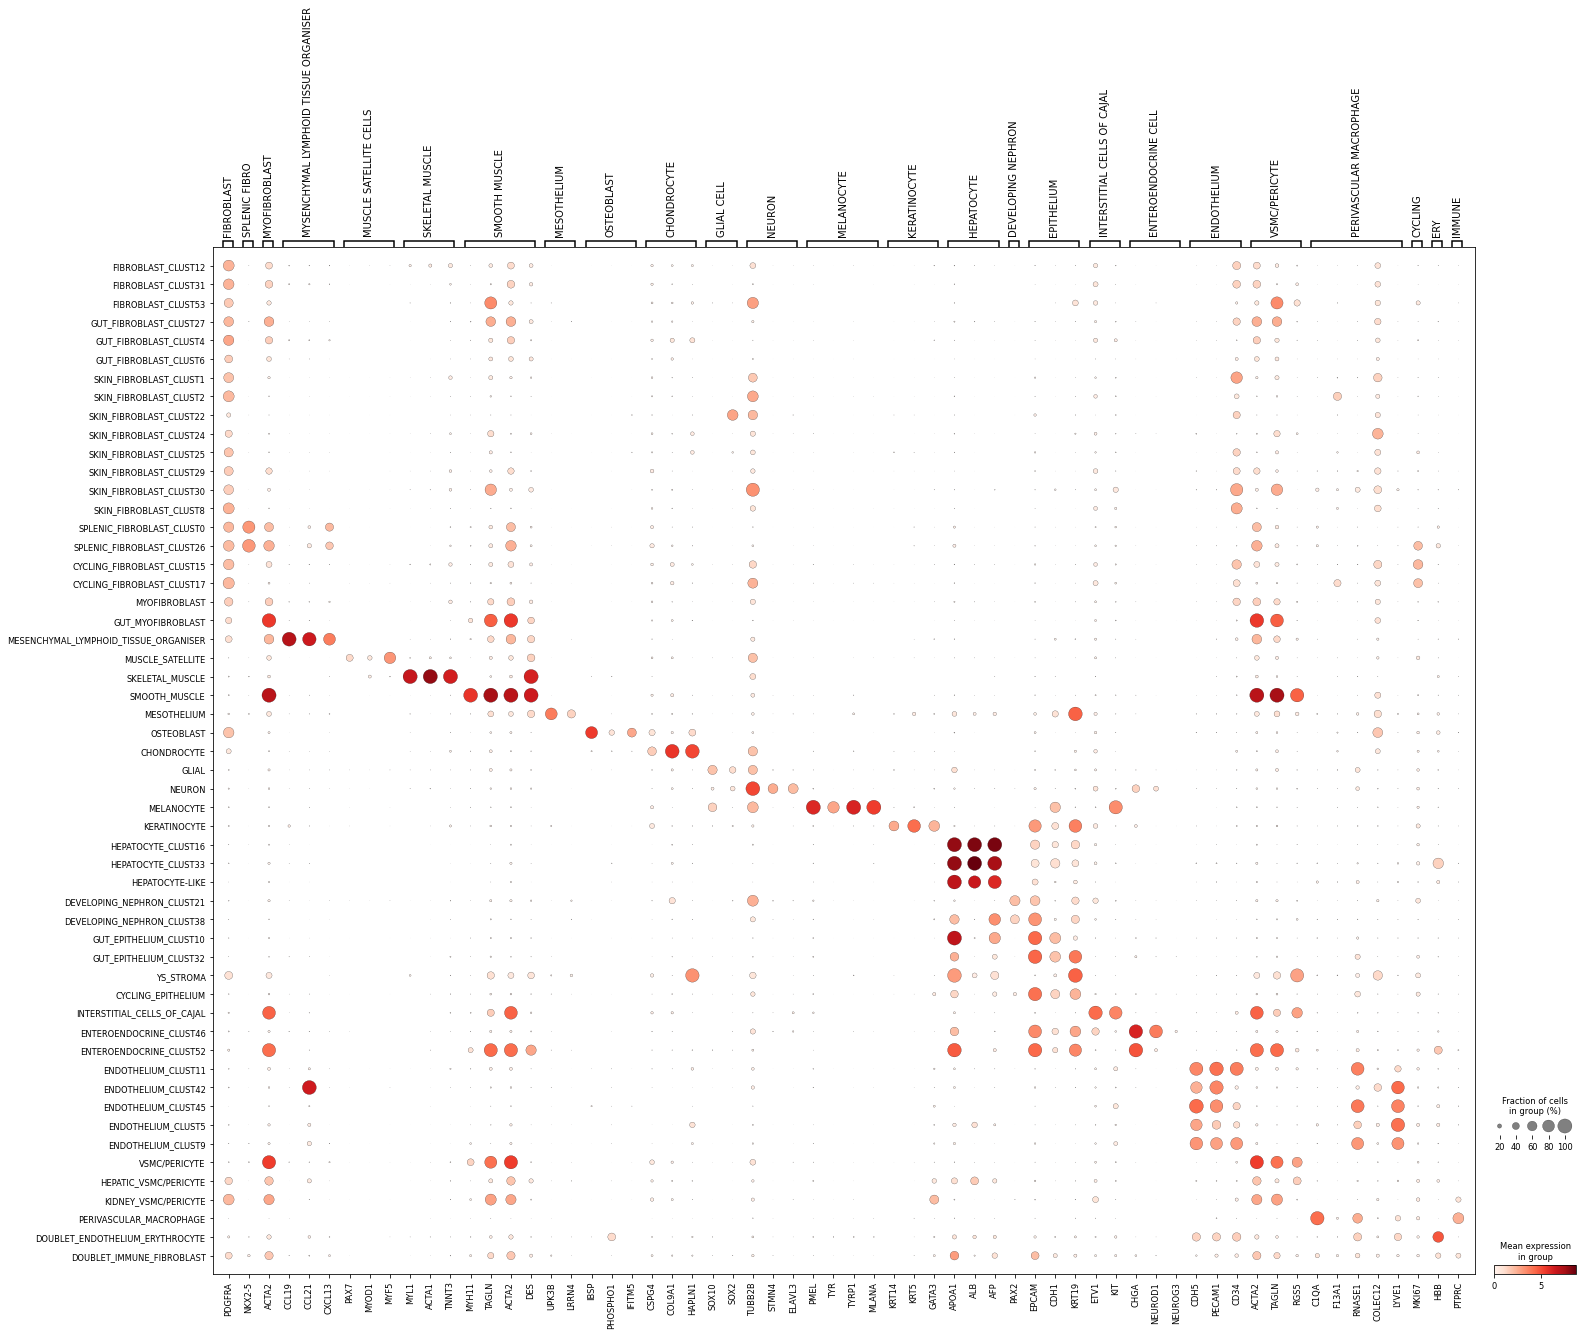

In [35]:
markers = {'FIBROBLAST':['PDGFRA'],
           'SPLENIC FIBRO':['NKX2-5'],
           'MYOFIBROBLAST':['ACTA2'],
           'MYSENCHYMAL LYMPHOID TISSUE ORGANISER':['CCL19','CCL21','CXCL13'],
           'MUSCLE SATELLITE CELLS':['PAX7','MYOD1','MYF5'],
           'SKELETAL MUSCLE':['MYL1','ACTA1','TNNT3'],
           'SMOOTH MUSCLE':['MYH11','TAGLN','ACTA2','DES'],
           'MESOTHELIUM':['UPK3B','LRRN4'],
           'OSTEOBLAST':['IBSP','PHOSPHO1','IFITM5'],
           'CHONDROCYTE':['CSPG4','COL9A1','HAPLN1'],
           'GLIAL CELL':['SOX10','SOX2'],
           'NEURON':['TUBB2B','STMN4','ELAVL3'],
           'MELANOCYTE':['PMEL','TYR','TYRP1','MLANA'],
           'KERATINOCYTE':['KRT14','KRT5','GATA3'],
           'HEPATOCYTE':['APOA1','ALB','AFP'],
           'DEVELOPING NEPHRON':['PAX2'],
           'EPITHELIUM':['EPCAM','CDH1','KRT19'],
           'INTERSTITIAL CELLS OF CAJAL':['ETV1','KIT'],
           'ENTEROENDOCRINE CELL':['CHGA','NEUROD1','NEUROG3'],
           'ENDOTHELIUM':['CDH5','PECAM1','CD34'],
           #'TIP EC':['VIM','PODXL','IL32','KDR'],
           'VSMC/PERICYTE':['ACTA2','TAGLN','RGS5'],
           'PERIVASCULAR MACROPHAGE':['C1QA','F13A1','RNASE1','COLEC12','LYVE1'],
           'CYCLING':['MKI67'],
           'ERY':['HBB'],
           'IMMUNE':['PTPRC']
          }
sc.pl.dotplot(stroma, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=False, save='stroma_clean_anno.png')